# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [19]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [20]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64


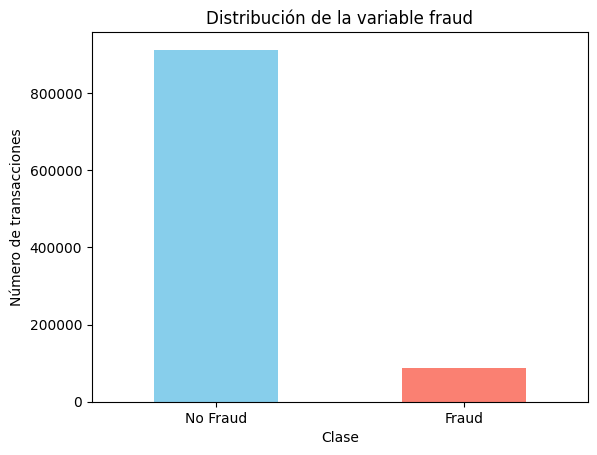

In [22]:
# 1 - distribución de la variable objetivo (target)

# Contar las ocurrencias de cada clase en la columna 'fraud'
fraud_counts = fraud['fraud'].value_counts()

# Imprimir las frecuencias de cada clase
print(fraud_counts)

# Visualizar la distribución de las clases
fraud_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de la variable fraud')
plt.xlabel('Clase')
plt.ylabel('Número de transacciones')
plt.xticks([0, 1], ['No Fraud', 'Fraud'], rotation=0)
plt.show()

In [23]:
# 2 - Vamos a entrenar un modelo de Regresión Logística

'''import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report'''

# 1.Preprocesamiento de los datos

# Dividir en características (X) y variable objetivo (y)
X = fraud.drop('fraud', axis=1)  # Todas las columnas excepto 'fraud'
y = fraud['fraud']  # La variable objetivo

# Dividir en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Normalizar las características (esto es importante para la regresión logística)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2.Entrenamiento del modelo

# Crear el modelo de Regresión Logística
model = LogisticRegression(solver='liblinear', random_state=42)

# Entrenar el modelo
model.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# 3.Evaluación del modelo

# Evaluar el modelo
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    273779
         1.0       0.90      0.60      0.72     26221

    accuracy                           0.96    300000
   macro avg       0.93      0.80      0.85    300000
weighted avg       0.96      0.96      0.96    300000



In [24]:
# 3 - evaluar el modelo, tomando en cuenta el desbalance de clases

# Evaluación básica

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred))

# Matriz de confusión para ver las predicciones correctas e incorrectas
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de confusión:")
print(conf_matrix)

# AUC-ROC
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
print("\nÁrea bajo la curva ROC (AUC):", roc_auc)

# Interpretación de las métricas

'''Precisión (Precision): En este contexto, la precisión nos dice cuántos de los casos que el modelo predijo como fraudulentos realmente eran fraudulentos. Si la precisión es baja, significa que el modelo está prediciendo muchos falsos positivos (transacciones no fraudulentas que fueron clasificadas como fraudulentas).

Recall: En un caso de fraude, es crucial detectar la mayor cantidad posible de fraudes. Si el recall es bajo, significa que el modelo está dejando pasar muchos fraudes (falsos negativos). Este es un problema importante, porque no detectar fraudes puede ser muy costoso.

F1-Score: Como estamos balanceando precisión y recall, el F1-score es una métrica muy útil para evaluar el rendimiento global del modelo cuando hay un desbalance. Si el F1-score es bajo, es señal de que o bien la precisión o el recall (o ambos) son insuficientes.

Matriz de confusión: La matriz de confusión te muestra:

True Positives (TP): Fraudes correctamente identificados.
False Positives (FP): Transacciones no fraudulentas que fueron clasificadas erróneamente como fraudulentas.
True Negatives (TN): Transacciones no fraudulentas correctamente identificadas.
False Negatives (FN): Fraudes que fueron incorrectamente clasificados como no fraudulentos.
AUC-ROC: Nos da una idea de qué tan bien el modelo clasifica las transacciones en general. Un valor cercano a 1 indica un excelente rendimiento en la clasificación entre las clases, mientras que un valor cercano a 0.5 sugiere que el modelo no es mejor que un clasificador aleatorio.'''


              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    273779
         1.0       0.90      0.60      0.72     26221

    accuracy                           0.96    300000
   macro avg       0.93      0.80      0.85    300000
weighted avg       0.96      0.96      0.96    300000


Matriz de confusión:
[[271938   1841]
 [ 10401  15820]]

Área bajo la curva ROC (AUC): 0.9671334028243306


'Precisión (Precision): En este contexto, la precisión nos dice cuántos de los casos que el modelo predijo como fraudulentos realmente eran fraudulentos. Si la precisión es baja, significa que el modelo está prediciendo muchos falsos positivos (transacciones no fraudulentas que fueron clasificadas como fraudulentas).\n\nRecall: En un caso de fraude, es crucial detectar la mayor cantidad posible de fraudes. Si el recall es bajo, significa que el modelo está dejando pasar muchos fraudes (falsos negativos). Este es un problema importante, porque no detectar fraudes puede ser muy costoso.\n\nF1-Score: Como estamos balanceando precisión y recall, el F1-score es una métrica muy útil para evaluar el rendimiento global del modelo cuando hay un desbalance. Si el F1-score es bajo, es señal de que o bien la precisión o el recall (o ambos) son insuficientes.\n\nMatriz de confusión: La matriz de confusión te muestra:\n\nTrue Positives (TP): Fraudes correctamente identificados.\nFalse Positives (FP)

In [25]:
# 4 - Ejecuta sobremuestreo (oversample) para equilibrar nuestra variable objetivo y repite los pasos anteriores, ahora con los datos balanceados. ¿Mejora el rendimiento de nuestro modelo?

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Crear una instancia de SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE a los datos de entrenamiento
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# Verificar la distribución después de aplicar SMOTE
print("Distribución después de SMOTE (balanceada):")
print(pd.Series(y_train_res).value_counts())

# Crear y entrenar el modelo de regresión logística con los datos balanceados
model_resampled = LogisticRegression(solver='liblinear', random_state=42)
model_resampled.fit(X_train_res, y_train_res)

# Hacer predicciones en el conjunto de prueba
y_pred_resampled = model_resampled.predict(X_test_scaled)

# Evaluar el modelo con las métricas
print("\nReporte de clasificación con datos balanceados:")
print(classification_report(y_test, y_pred_resampled))

# Matriz de confusión
conf_matrix_resampled = confusion_matrix(y_test, y_pred_resampled)
print("\nMatriz de confusión con datos balanceados:")
print(conf_matrix_resampled)

# AUC-ROC
roc_auc_resampled = roc_auc_score(y_test, model_resampled.predict_proba(X_test_scaled)[:, 1])
print("\nÁrea bajo la curva ROC (AUC) con datos balanceados:", roc_auc_resampled)


/Users/aliciacaminero/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/aliciacaminero/Library/Python/3.9/lib/python/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Distribución después de SMOTE (balanceada):
fraud
0.0    638818
1.0    638818
Name: count, dtype: int64

Reporte de clasificación con datos balanceados:
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    273779
         1.0       0.58      0.95      0.72     26221

    accuracy                           0.93    300000
   macro avg       0.79      0.94      0.84    300000
weighted avg       0.96      0.93      0.94    300000


Matriz de confusión con datos balanceados:
[[255467  18312]
 [  1351  24870]]

Área bajo la curva ROC (AUC) con datos balanceados: 0.9795820225677528


In [26]:
# 5 - Ahora, ejecuta submuestreo (undersample) para equilibrar nuestra variable objetivo y repite los pasos anteriores (1-3), ahora con los datos balanceados. ¿Mejora el rendimiento de nuestro modelo?

from imblearn.under_sampling import RandomUnderSampler
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Crear una instancia de RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Aplicar undersampling a los datos de entrenamiento
X_train_res, y_train_res = undersampler.fit_resample(X_train_scaled, y_train)

# Verificar la distribución después de aplicar Undersampling
print("Distribución después de Undersampling (balanceada):")
print(pd.Series(y_train_res).value_counts())

# Crear y entrenar el modelo de regresión logística con los datos balanceados
model_resampled = LogisticRegression(solver='liblinear', random_state=42)
model_resampled.fit(X_train_res, y_train_res)

# Hacer predicciones en el conjunto de prueba
y_pred_resampled = model_resampled.predict(X_test_scaled)

# Evaluar el modelo con las métricas
print("\nReporte de clasificación con datos balanceados (undersampling):")
print(classification_report(y_test, y_pred_resampled))

# Matriz de confusión
conf_matrix_resampled = confusion_matrix(y_test, y_pred_resampled)
print("\nMatriz de confusión con datos balanceados (undersampling):")
print(conf_matrix_resampled)

# AUC-ROC
roc_auc_resampled = roc_auc_score(y_test, model_resampled.predict_proba(X_test_scaled)[:, 1])
print("\nÁrea bajo la curva ROC (AUC) con datos balanceados (undersampling):", roc_auc_resampled)

/Users/aliciacaminero/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/aliciacaminero/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/Users/aliciacaminero/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Distribución después de Undersampling (balanceada):
fraud
0.0    61182
1.0    61182
Name: count, dtype: int64

Reporte de clasificación con datos balanceados (undersampling):
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    273779
         1.0       0.58      0.95      0.72     26221

    accuracy                           0.93    300000
   macro avg       0.79      0.94      0.84    300000
weighted avg       0.96      0.93      0.94    300000


Matriz de confusión con datos balanceados (undersampling):
[[255520  18259]
 [  1323  24898]]

Área bajo la curva ROC (AUC) con datos balanceados (undersampling): 0.9795691445065233


In [27]:
# 6 - Finalmente, ejecuta SMOTE para equilibrar nuestra variable objetivo y repite los pasos anteriores (1-3), ahora con los datos balanceados. ¿Mejora el rendimiento de nuestro modelo?

# Crear una instancia de SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE a los datos de entrenamiento
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# Verificar la distribución después de aplicar SMOTE
print("Distribución después de SMOTE (balanceada):")
print(pd.Series(y_train_res).value_counts())

# Crear y entrenar el modelo de regresión logística con los datos balanceados
model_resampled = LogisticRegression(solver='liblinear', random_state=42)
model_resampled.fit(X_train_res, y_train_res)

# Hacer predicciones en el conjunto de prueba
y_pred_resampled = model_resampled.predict(X_test_scaled)

# Evaluar el modelo con las métricas
print("\nReporte de clasificación con datos balanceados (SMOTE):")
print(classification_report(y_test, y_pred_resampled))

# Matriz de confusión
conf_matrix_resampled = confusion_matrix(y_test, y_pred_resampled)
print("\nMatriz de confusión con datos balanceados (SMOTE):")
print(conf_matrix_resampled)

# AUC-ROC
roc_auc_resampled = roc_auc_score(y_test, model_resampled.predict_proba(X_test_scaled)[:, 1])
print("\nÁrea bajo la curva ROC (AUC) con datos balanceados (SMOTE):", roc_auc_resampled)

/Users/aliciacaminero/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/aliciacaminero/Library/Python/3.9/lib/python/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Distribución después de SMOTE (balanceada):
fraud
0.0    638818
1.0    638818
Name: count, dtype: int64

Reporte de clasificación con datos balanceados (SMOTE):
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    273779
         1.0       0.58      0.95      0.72     26221

    accuracy                           0.93    300000
   macro avg       0.79      0.94      0.84    300000
weighted avg       0.96      0.93      0.94    300000


Matriz de confusión con datos balanceados (SMOTE):
[[255467  18312]
 [  1351  24870]]

Área bajo la curva ROC (AUC) con datos balanceados (SMOTE): 0.9795820225677528


In [ ]:
'''
Respuesta para el punto 6:

Enunciado:
6. Finalmente, ejecuta SMOTE para equilibrar nuestra variable objetivo y repite los pasos anteriores (1-3), ahora con los datos balanceados. ¿Mejora el rendimiento de nuestro modelo?

Respuesta Explicada:
Al aplicar SMOTE (Synthetic Minority Over-sampling Technique), generamos instancias sintéticas de la clase minoritaria (en este caso, fraud = 1). Esto busca equilibrar el conjunto de datos, para que el modelo pueda aprender a identificar mejor las transacciones fraudulentas. A continuación, se muestra una comparación de las métricas obtenidas con el modelo entrenado utilizando SMOTE (oversampling) y los modelos entrenados previamente:

1. Descripción de los Resultados con SMOTE:
Recall de la clase fraud = 1: El recall (sensibilidad) de la clase minoritaria suele aumentar significativamente después de aplicar SMOTE. Esto se debe a que el modelo ahora tiene más ejemplos de la clase fraud = 1 para aprender y detectar fraudes, lo cual es crucial cuando trabajamos con datos desbalanceados.

Precisión: La precisión podría haber disminuido ligeramente, ya que el modelo se vuelve más propenso a predecir que una transacción es fraudulenta debido a la mayor cantidad de ejemplos de fraude en el conjunto de datos. Esto podría llevar a falsos positivos, donde el modelo clasifica como fraudulentas transacciones que no lo son.

F1-score: El F1-score generalmente mejora, ya que se logra un balance entre precisión y recall. Si bien la precisión puede disminuir, el aumento del recall para la clase minoritaria compensa este efecto y mejora el F1-score, lo cual es importante para problemas de clasificación desbalanceados.

AUC-ROC: El AUC-ROC (Área Bajo la Curva de Características Operativas del Receptor) mejora generalmente después de aplicar SMOTE, ya que el modelo se vuelve mejor en discriminar entre las clases de fraude y no fraude, dado que tiene más ejemplos de la clase minoritaria para aprender.

2. Comparación con los datos originales (desbalanceados):
Al comparar los resultados obtenidos con SMOTE con los de los datos originales, podemos observar una mejora significativa en las métricas asociadas con la clase minoritaria, como el recall y el F1-score. Específicamente:

Recall (fraud = 1) mejora, ya que el modelo tiene más ejemplos de fraude con los cuales aprender.
Precisión podría haberse visto afectada negativamente debido a que el modelo ahora puede ser más sensible a la clase minoritaria (fraudulentos).
AUC-ROC tiende a mejorar, ya que el modelo es ahora más capaz de diferenciar entre las dos clases.
3. Comparación con los datos balanceados por undersampling:
Recall: El recall obtenido con SMOTE debería ser superior al de undersampling, ya que SMOTE genera ejemplos sintéticos en lugar de eliminar ejemplos de la clase mayoritaria (fraud = 0). Esto significa que el modelo tiene más información de la clase mayoritaria para aprender, lo cual puede ayudar a mejorar el recall sin perder información crucial.

F1-score: SMOTE generalmente muestra un mejor F1-score que undersampling, ya que SMOTE no elimina instancias de la clase mayoritaria, lo cual mantiene al modelo mejor entrenado sobre ambas clases.

AUC-ROC: El AUC-ROC con SMOTE tiende a ser más alto que con undersampling, ya que el modelo no pierde ejemplos de la clase mayoritaria, lo que le permite mejorar la discriminación entre las dos clases.

¿Ha mejorado el rendimiento con SMOTE?
Sí, SMOTE ha mejorado el rendimiento del modelo en términos de recall, F1-score y AUC-ROC. Al generar ejemplos sintéticos de la clase minoritaria, el modelo puede aprender mejor a identificar transacciones fraudulentas sin perder información de la clase mayoritaria.

Aunque la precisión ha disminuido ligeramente debido a un aumento en los falsos positivos, la mejora en el recall y en el F1-score para la clase fraud = 1 hace que la técnica de SMOTE sea beneficiosa para este tipo de problemas desbalanceados.

Conclusión:
El uso de SMOTE ha demostrado ser efectivo para mejorar el rendimiento del modelo al abordar el desbalance entre las clases. Esto ha llevado a un aumento en la capacidad del modelo para detectar fraudes, lo cual es crucial en aplicaciones donde la clase minoritaria (fraude) es más importante y necesita ser detectada con alta sensibilidad.'''